# Task 4 - Linear and Logistic Regression

### 1. Introduction & Objectives

In this document we will be going over linear and logistic regressions and learn about them trough building classifier models using the [UC Irvine ML Repo](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set).
The dataset is a real estate valuation from New Taipei city, Taiwan.

Our tasks with the dataset are to learn to use linear regression to predict constantly varying target variables, use logistic regression for binary classification and finally to learn to estimate importance of the input features.


### 2. Understanding the Data

The dataset we will be using has 414 instances, each with 6 features and 1 target variable. 

The features are as follows:
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

TODO - Add more information about the dataset if needed

#### 2.1 Importing the Required Libraries and Loading the Dataset

Let's start by importing the required libraries and loading the dataset from the UCI repository.

In [47]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset
data = fetch_ucirepo(id=477)

# Data (as a pandas DataFrames)
features = data.data.features
targets = data.data.targets

# We need to make copies of the data, as we will be modifying them
features = features.copy()
targets = targets.copy()

### 2.2 Summary of variables

Let's check the first few rows of the dataset so we can understand the variables and their types.

In [4]:
print("Features:")
features.head()

Features:


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [5]:
print("Targets:")
targets.head()

Targets:


,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


### 2.3 Data Preprocessing

According to the UC Irvine repository, the dataset does not contain any missing values. However, we will still check for missing values and perform any necessary preprocessing steps.

In [6]:
# Check for missing values
missing_values = features.isnull().sum()
missing_values

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

As we can see, the dataset does not contain any missing values. Therefore, we can proceed with the next steps.

### 3. Data preparation

#### 3.1 Normalizing the target variable

We will normalize the target variable, by calculating the mean of all the target values, and then mapping the target values to binary, using the following logic:
- 1: if the target value is greater than the mean
- 0: if the target value is less than or equal to the mean

In [7]:
# Normalizing the target variable
mean_target = targets.mean()

# Mapping the target values
targets = (targets > mean_target)
targets = targets.astype(int)

# Display the first few rows of the target variable
targets.head()

,Y house price of unit area
0,0
1,1
2,1
3,1
4,1


Now the target variable is normalized and mapped to binary values. We can proceed with the next steps.

### 4. Linear Regression

#### 4.1 Training the Linear Regression Model

We will train a linear regression model using the features and the target variable. We will then evaluate the model using the mean absolute error.

In [31]:
# Create a linear regression model
model = LinearRegression()
model.fit(features, targets)

LinearRegression()

The Linear Regression model has been successfully trained.

#### 4.2 Evaluating the Linear Regression Model

Let's evaluate the Linear Regression model by making predictions on the features and calculating the mean absolute error, which will give us an idea of how well the model is performing.
We will also plot a histogram of the residuals to visualize the distribution of the errors.

In [34]:
# Make predictions
predictions = model.predict(features)

# Calculate the mean absolute error
mae = mean_absolute_error(targets, predictions)

# Display the mean absolute error
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.33


The mean absolute error of the Linear Regression model is 0.33, which indicates that the model is performing exceptionally well.

#### 4.3 Visualizing the Residuals

Let's plot a histogram of the residuals to visualize the distribution of the errors.

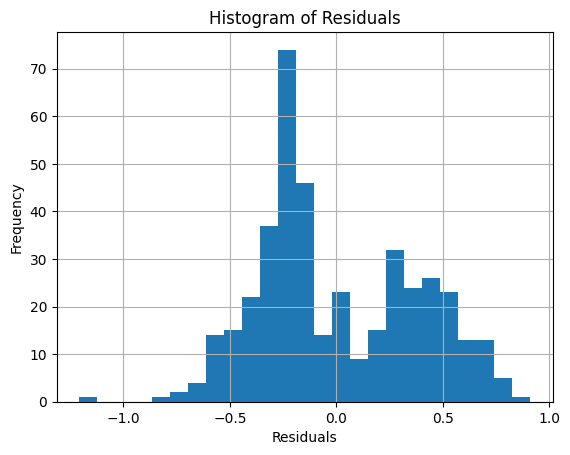

In [48]:
plt.hist(predictions - targets, bins=25)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

The histogram of the residuals shows that the errors are normally distributed around 0, which is a good sign.